# Processing Notebook

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Read csv

In [2]:
df: pd.DataFrame = pd.read_csv("neutron50_50.csv")
original_len = len(df['vx'])
df.head()

,vx,vy,vz,sci_photons,xpos0,ypos0,photons0,xpos1,ypos1,photons1,xpos2,ypos2,photons2,xpos3,ypos3,photons3
0,12.3826,-46.6999,7.08309,57,-50.0,-50.0,1,-99.9,-99.9,-1,-99.9,-99.9,-1,-99.9,-99.9,-1
1,49.3081,-39.3816,5.65242,89,-99.9,-99.9,-1,-99.9,-99.9,-1,-99.9,-99.9,-1,-99.9,-99.9,-1
2,-45.6671,49.8661,4.98877,79,-99.9,-99.9,-1,-50.0,50.0,3,-99.9,-99.9,-1,-99.9,-99.9,-1
3,43.4252,-11.3135,3.31407,141033,-50.0,-50.0,62,-50.0,50.0,47,50.0,-50.0,177,50.0,50.0,103
4,21.8195,-36.2481,2.77948,77,-99.9,-99.9,-1,-99.9,-99.9,-1,-99.9,-99.9,-1,-99.9,-99.9,-1


## Dynamically determine which columns are right or left and up or down

In [3]:
left_dropnames = [] # Columns to drop to get left subset
right_dropnames = [] # Columns to drop to get right subset
up_dropnames = [] # Columns to drop to get up subset
down_dropnames = [] # Columns to drop to get down subset
nx = 2
ny = 2
num = 0
for i in range(nx):
    for j in range(ny):
        if i < (nx / 2):
            print("left:",num)
            right_dropnames.append(f"photons{num}")
            right_dropnames.append(f"ypos{num}")
            right_dropnames.append(f"xpos{num}")
        else:
            print("right",num)
            left_dropnames.append(f"photons{num}")
            left_dropnames.append(f"ypos{num}")
            left_dropnames.append(f"xpos{num}")

        if j < (ny / 2):
            print("down:",num)
            up_dropnames.append(f"photons{num}")
            up_dropnames.append(f"ypos{num}")
            up_dropnames.append(f"xpos{num}")
        else:
            print('up:',num)
            down_dropnames.append(f"photons{num}")
            down_dropnames.append(f"ypos{num}")
            down_dropnames.append(f"xpos{num}")

        df = df[df[f'photons{num}'] != -1]
        num += 1

left: 0
down: 0
left: 1
up: 1
right 2
down: 2
right 3
up: 3


## Create R,L,U,D Subsets and Find totals

In [4]:
left: pd.DataFrame = df.drop(left_dropnames,axis=1)
right: pd.DataFrame = df.drop(right_dropnames,axis=1)
up: pd.DataFrame = df.drop(up_dropnames,axis=1)
down: pd.DataFrame = df.drop(down_dropnames,axis=1)

In [5]:
n = nx * ny

left['total'] = np.zeros_like(left['vx']).astype(int)
right["total"] = np.zeros_like(right['vx']).astype(int)
up['total'] = np.zeros_like(up['vx']).astype(int)
down['total'] = np.zeros_like(down['vx']).astype(int)
df["total"] = np.zeros_like(df['vx']).astype(int)
for i in range(n):
    # LEFT AND RIGHT
    try:
        left['total'] = left['total'] + left[f"photons{i}"]
    except:
        pass
    try:
        right['total'] = right['total'] + right[f"photons{i}"]
    except:
        pass

    # UP AND DOWN
    try:
        up['total'] = up['total'] + up[f'photons{i}']
    except:
        pass
    try:
        down['total'] = down['total'] + down[f'photons{i}']
    except:
        pass

    df['total'] = df['total'] + df[f"photons{i}"]

GATE = df['total'] > 200

left = left[GATE]
right = right[GATE]
up = up[GATE]
down= down[GATE]
df = df[GATE]

## Efficiency

In [6]:
print(f'Efficiency: {len(df['vx'])/original_len * 100}%')

Efficiency: 18.864148111083313%


## Plots

Text(0.5, 0, 'vx')

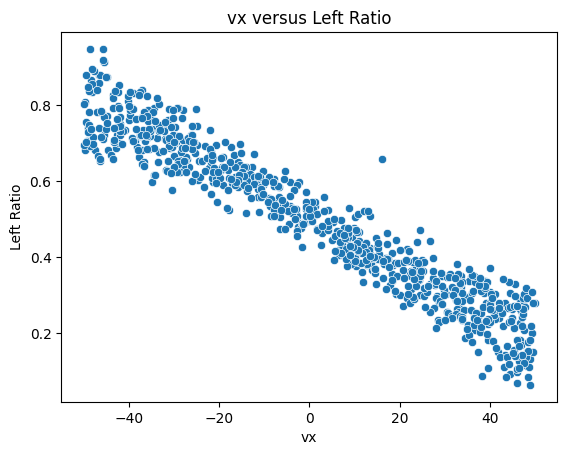

In [7]:
left_ratio = left['total']/df['total']
sns.scatterplot(x=df["vx"],y=left_ratio)
plt.title("vx versus Left Ratio")
plt.ylabel("Left Ratio")
plt.xlabel("vx")

Text(0.5, 0, 'vx')

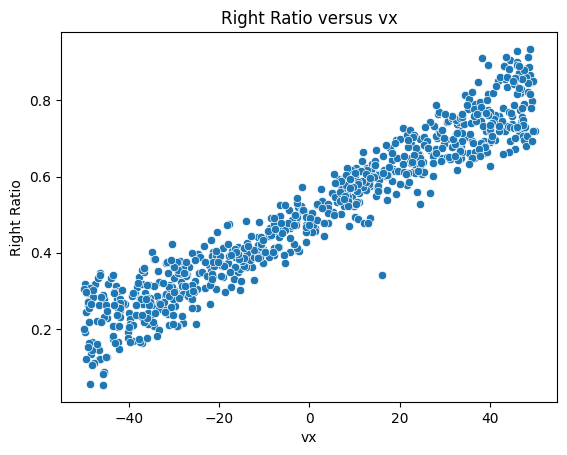

In [8]:
right_ratio = right['total']/df['total']
sns.scatterplot(x=df["vx"],y=right_ratio)
plt.title("Right Ratio versus vx")
plt.ylabel("Right Ratio")
plt.xlabel("vx")

Text(0.5, 0, 'vy')

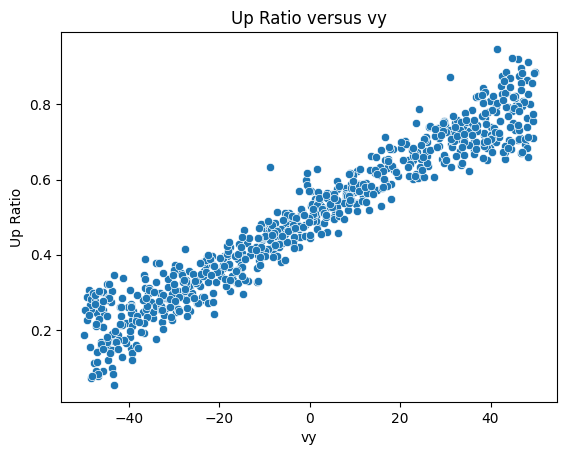

In [9]:
up_ratio = up['total']/df['total']
sns.scatterplot(x=df["vy"],y=up_ratio)
plt.title("Up Ratio versus vy")
plt.ylabel("Up Ratio")
plt.xlabel("vy")

Text(0.5, 0, 'vy')

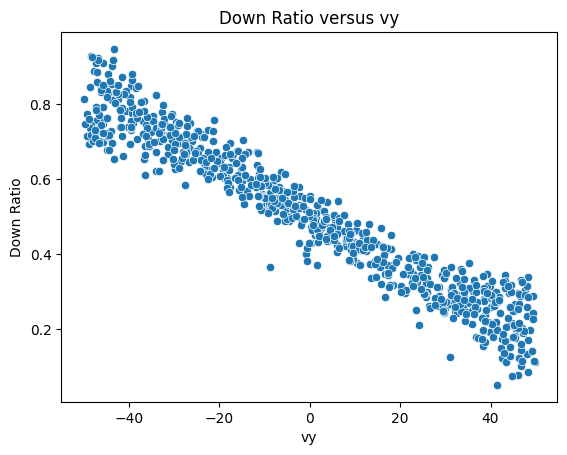

In [10]:
down_ratio = down['total']/df['total']
sns.scatterplot(x=df["vy"],y=down_ratio)
plt.title("Down Ratio versus vy")
plt.ylabel("Down Ratio")
plt.xlabel("vy")

## Curve Fits

Text(0.5, 1.0, 'y vertex versus ratio')

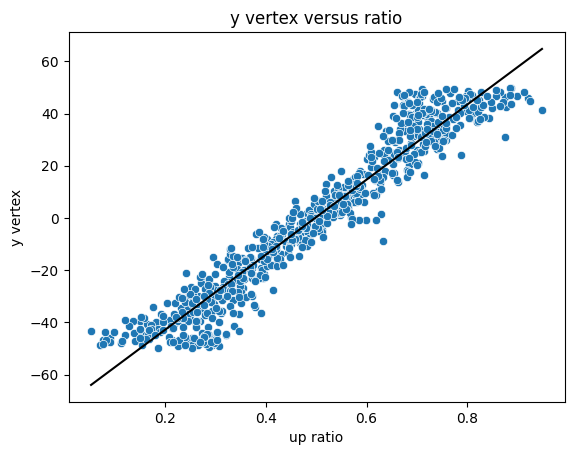

In [19]:
p = np.poly1d(np.polyfit(x=up_ratio,y=up['vy'],deg=1))
sns.scatterplot(x=up_ratio,y=up['vy'])
sns.lineplot(x=up_ratio,y=p(up_ratio),c='black')
plt.xlabel('up ratio')
plt.ylabel('y vertex')
plt.title('y vertex versus ratio')

Text(0.5, 1.0, 'x vertex versus ratio')

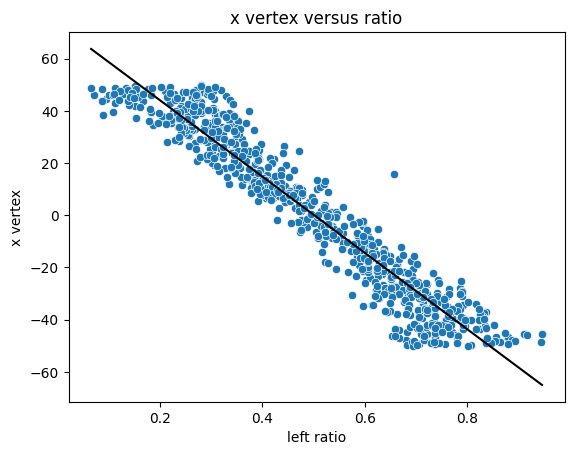

In [20]:
p = np.poly1d(np.polyfit(x=left_ratio,y=left['vx'],deg=1))
sns.scatterplot(x=left_ratio,y=up['vx'])
sns.lineplot(x=left_ratio,y=p(left_ratio),c='black')
plt.xlabel('left ratio')
plt.ylabel('x vertex')
plt.title('x vertex versus ratio')

## Error Plots

Text(0.5, 1.0, 'Y Error versus vy')

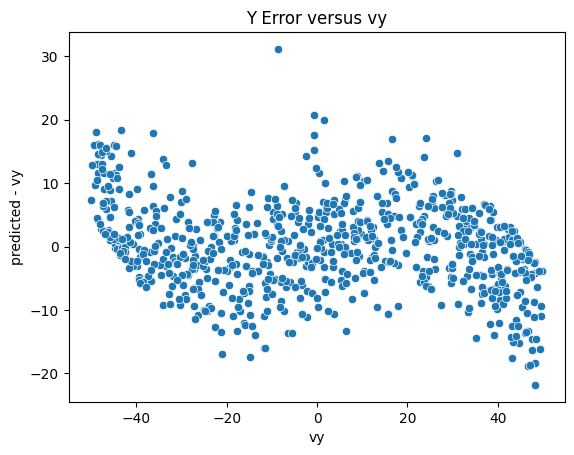

In [13]:
p = np.poly1d(np.polyfit(x=up_ratio,y=up['vy'],deg=3))
sns.scatterplot(x=up['vy'],y=p(up_ratio)-up['vy'])
plt.ylabel('predicted - vy')
plt.title('Y Error versus vy')

Text(0.5, 1.0, 'Y Error versus vz')

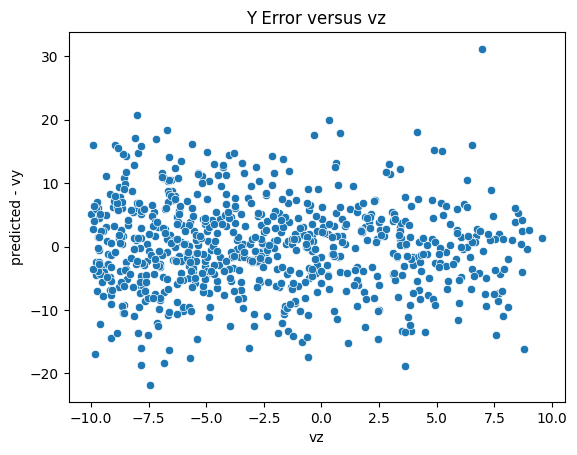

In [14]:
sns.scatterplot(x=up['vz'],y=p(up_ratio)-up['vy'])
plt.ylabel('predicted - vy')
plt.title('Y Error versus vz')

Text(0.5, 1.0, 'X Error versus vx')

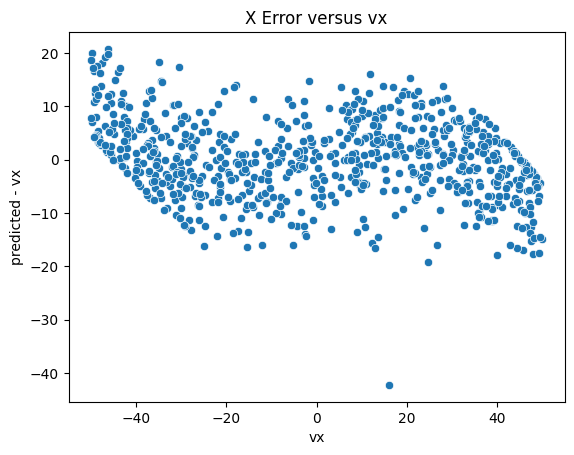

In [15]:
p = np.poly1d(np.polyfit(x=left_ratio,y=left['vx'],deg=3))
sns.scatterplot(x=left['vx'],y=p(left_ratio)-left['vx'])
plt.ylabel('predicted - vx')
plt.title('X Error versus vx')

Text(0.5, 1.0, 'X Error versus vz')

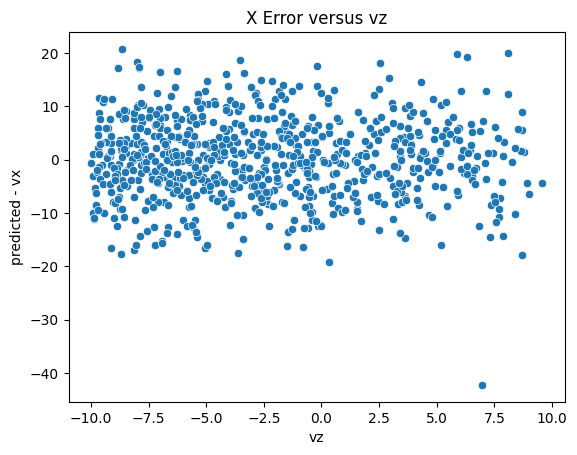

In [16]:
sns.scatterplot(x=left['vz'],y=p(left_ratio)-left['vx'])
plt.ylabel('predicted - vx')
plt.title('X Error versus vz')

## Standard Deviations

In [17]:
for i in range(5):
    p = np.poly1d(np.polyfit(x=left_ratio,y=left['vx'],deg=i))
    pred = p(left_ratio)
    print(f"Deg = {i}, sd = {np.std(pred-left['vx'])}")

Deg = 0, sd = 30.476636270811337
Deg = 1, sd = 8.39750153066588
Deg = 2, sd = 8.388139432837413
Deg = 3, sd = 7.4478524094838
Deg = 4, sd = 7.447582423352153


In [18]:
for i in range(5):
    p = np.poly1d(np.polyfit(x=up_ratio,y=up['vy'],deg=i))
    pred = p(up_ratio)
    print(f"Deg = {i}, sd = {np.std(pred-up['vy'])}")

Deg = 0, sd = 29.93631975537835
Deg = 1, sd = 7.842880526862657
Deg = 2, sd = 7.834721163659493
Deg = 3, sd = 7.016031874572751
Deg = 4, sd = 7.010312818368138


In [28]:
def getSDandEff(df: pd.DataFrame):
    left_dropnames = [] # Columns to drop to get left subset
    right_dropnames = [] # Columns to drop to get right subset
    up_dropnames = [] # Columns to drop to get up subset
    down_dropnames = [] # Columns to drop to get down subset
    nx = 2
    ny = 2
    num = 0
    for i in range(nx):
        for j in range(ny):
            if i < (nx / 2):
                right_dropnames.append(f"photons{num}")
                right_dropnames.append(f"ypos{num}")
                right_dropnames.append(f"xpos{num}")
            else:
                left_dropnames.append(f"photons{num}")
                left_dropnames.append(f"ypos{num}")
                left_dropnames.append(f"xpos{num}")

            if j < (ny / 2):
                up_dropnames.append(f"photons{num}")
                up_dropnames.append(f"ypos{num}")
                up_dropnames.append(f"xpos{num}")
            else:
                down_dropnames.append(f"photons{num}")
                down_dropnames.append(f"ypos{num}")
                down_dropnames.append(f"xpos{num}")

            df = df[df[f'photons{num}'] != -1]
            num += 1
    
    left: pd.DataFrame = df.drop(left_dropnames,axis=1)
    right: pd.DataFrame = df.drop(right_dropnames,axis=1)
    up: pd.DataFrame = df.drop(up_dropnames,axis=1)
    down: pd.DataFrame = df.drop(down_dropnames,axis=1)

    n = nx * ny

    left['total'] = np.zeros_like(left['vx']).astype(int)
    right["total"] = np.zeros_like(right['vx']).astype(int)
    up['total'] = np.zeros_like(up['vx']).astype(int)
    down['total'] = np.zeros_like(down['vx']).astype(int)
    df["total"] = np.zeros_like(df['vx']).astype(int)
    for i in range(n):
        # LEFT AND RIGHT
        try:
            left['total'] = left['total'] + left[f"photons{i}"]
        except:
            pass
        try:
            right['total'] = right['total'] + right[f"photons{i}"]
        except:
            pass

        # UP AND DOWN
        try:
            up['total'] = up['total'] + up[f'photons{i}']
        except:
            pass
        try:
            down['total'] = down['total'] + down[f'photons{i}']
        except:
            pass

        df['total'] = df['total'] + df[f"photons{i}"]

    GATE = df['total'] > 200

    left = left[GATE]
    right = right[GATE]
    up = up[GATE]
    down= down[GATE]
    df = df[GATE]

    e = len(df['vx'])/original_len * 100

    left_ratio = left['total']/df['total']
    right_ratio = right['total']/df['total']
    up_ratio = up['total']/df['total']
    down_ratio = down['total']/df['total']
    
    pleft = np.poly1d(np.polyfit(x=left_ratio,y=left['vx'],deg=3))
    pright = np.poly1d(np.polyfit(x=right_ratio,y=right['vx'],deg=3))
    pup = np.poly1d(np.polyfit(x=up_ratio,y=up['vy'],deg=3))
    pdown = np.poly1d(np.polyfit(x=down_ratio,y=down['vy'],deg=3))

    sd_dict = {
        "leftsd":np.std(pleft(left_ratio)-left['vx']),
        "rightsd":np.std(pright(right_ratio)-right['vx']),
        "upsd":np.std(pup(up_ratio)-up['vy']),
        "downsd":np.std(pdown(down_ratio)-down['vy']),
    }

    return e,sd_dict

In [29]:
dim = 15
while dim <= 50:
    try:
        df = pd.read_csv(f"neutron{dim}_{dim}.csv")
        dim += 5
    except:
        dim += 5
        continue

    e,std = getSDandEff(df)
    print(f"{dim = }: Efficiency {e}, SDs {std}")


dim = 20: Efficiency 31.548661496122094, SDs {'leftsd': 3.3505024368455656, 'rightsd': 3.350502436845566, 'upsd': 3.1557921472220514, 'downsd': 3.1557921472220514}
dim = 25: Efficiency 28.996747560670507, SDs {'leftsd': 3.764943025395524, 'rightsd': 3.7649430253955236, 'upsd': 3.825210813429532, 'downsd': 3.825210813429533}
dim = 30: Efficiency 26.394796097072803, SDs {'leftsd': 4.203816513719563, 'rightsd': 4.203816513719563, 'upsd': 4.176375789253752, 'downsd': 4.176375789253752}
dim = 35: Efficiency 24.49337002752064, SDs {'leftsd': 4.687595840988353, 'rightsd': 4.687595840988354, 'upsd': 4.845081495859756, 'downsd': 4.845081495859757}
dim = 40: Efficiency 22.81711283462597, SDs {'leftsd': 5.199667866036316, 'rightsd': 5.199667866036316, 'upsd': 5.544740388848579, 'downsd': 5.544740388848579}
dim = 55: Efficiency 18.864148111083313, SDs {'leftsd': 7.4478524094838, 'rightsd': 7.4478524094838, 'upsd': 7.016031874572751, 'downsd': 7.016031874572751}
